# Part 1

[-5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.
  1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


[-6, 6, -1.5, 1.5]

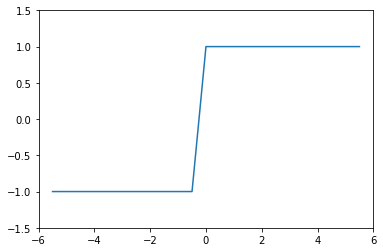

In [7]:
def activation_function(x):
    if x < 0:
        return -1
    else:
        return 1

rnge = np.linspace(-5.5, 5.5, num=23)
print(rnge)
values = [activation_function(i) for i in rnge]
plt.plot(rnge, values)
plt.axis([-6, 6, -1.5, 1.5])

In [8]:
def perceptron(inp, weights):
    dot_product = np.dot(inp, weights)
    output = activation_function(dot_product)
    return output

# Part 2

Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice


In [4]:
import numpy as np 
import pandas as pd
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt


headers = ["weight","height","type"]
data = pd.read_csv("Rodents.csv", sep=';', header = None, names = headers, skiprows=1)
df = pd.DataFrame(data)

mouse = df.loc[df['type'] == 'mouse']
rat = df.loc[df['type'] == 'rat']

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=mouse['weight'], y=mouse['height'], label="Mouse")
ax1.scatter(x=rat['weight'], y=rat['height'], label="Rat")

plt.xlabel("Weight")
plt.ylabel("Height")

# Manual line
slope = (rat['height'].sum()/250 - mouse['height'].sum()/250) / (rat['weight'].sum()/250 - mouse['weight'].sum()/250)
print(-slope)
x = np.linspace(0, 250)
y = -slope * x + df['height'].max()

plt.plot(x, y, label="Manual Perceptron")
plt.legend(loc="lower right")
plt.show()

-0.09405345495111152


<Figure size 640x480 with 1 Axes>

### What is slope and intercept of the linear function?
Slope is -0.094, and intercept is ?

### Now change the 'type' column to represent rats as 1 and mice as -1
### Clean up any rows with null data

In [5]:
# Drops rows where NaN is present
df = df.dropna(axis='rows')

# Replaces rat and mouse with 1 and -1 in column 'type'
df['type'].replace('rat', 1, inplace=True)
df['type'].replace('mouse', -1, inplace=True)
df


,weight,height,type
0,233.479920,23.514130,1
1,231.324467,26.033830,1
2,17.906954,6.846577,-1
3,230.276523,24.077800,1
4,20.360593,6.605983,-1
...,...,...,...
244,20.614362,6.575722,-1
245,22.249846,6.951267,-1
246,228.568162,27.146987,1
247,229.002922,23.526073,1


### Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats

In [9]:
rodents = [[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]

weight = [40, -190]

# Predicts if it's a rat or mouse
for rodent in rodents:
    if perceptron(rodent, weight) == 1:
        print(str(perceptron(rodent, weight)) + ' rat')
    else:
        print(str(perceptron(rodent, weight)) + ' mouse')

1 rat
-1 mouse
1 rat


In [13]:
def pla(training_data, no_iterations=10000, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    Parameters:
    training_data: list of vectors, as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    """

    dim = len(training_data[0][0])
    weights = np.random.random(
        dim
    )  # error and weights (for x and y) start out as random numbers

    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]

    for i in range(no_iterations):

        # breakpoint()
        inp_vec, expected_label = training_data[
            i % len(training_data)
        ]  # expected labels are 1 or -1
        perceptron_output = perceptron(
            inp_vec, weights
        )  # perceptron output id a decimal between 0 and 1
        error = expected_label - perceptron_output  # error
        weights += eta * error * inp_vec  # accumulate the weights
        weight_history.append(np.copy(weights))

    return weights, weight_history

td = df[['height', 'weight']][:9]
print(td)
#learned_weights, weight_history = pla(td)
    # print(weight_history)
#print("LEARNED WEIGHTS", learned_weights)

height      weight
0  23.514130  233.479920
1  26.033830  231.324467
2   6.846577   17.906954
3  24.077800  230.276523
4   6.605983   20.360593
5   6.812460   21.605388
6  11.035404   17.857287
7   3.426412   22.126466
8  10.224681   16.705946
